In [2]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
GREYSCALE = True
img_name = "uploads/ibex.jpg"

# Read in the image, convert to greyscale.
img = Image.open(img_name)
if GREYSCALE:
    img = img.convert('L')

width, height = img.size
new_width = 400
new_height = int(height * new_width / width)
img = img.resize((new_width, new_height), Image.ANTIALIAS)


C:\Users\schra\AppData\Local\Temp\ipykernel_3752\4230286265.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((new_width, new_height), Image.ANTIALIAS)


In [4]:

def get_new_val(old_val, nc):
    """
    Get the "closest" colour to old_val in the range [0,1] per channel divided
    into nc values.

    """

    return np.round(old_val * (nc - 1)) / (nc - 1)

# For RGB images, the following might give better colour-matching.
#p = np.linspace(0, 1, nc)
#p = np.array(list(product(p,p,p)))
#def get_new_val(old_val):
#    idx = np.argmin(np.sum((old_val[None,:] - p)**2, axis=1))
#    return p[idx]

def fs_dither(img, nc):
    """
    Floyd-Steinberg dither the image img into a palette with nc colours per
    channel.

    """

    arr = np.array(img, dtype=float) / 255

    for ir in range(new_height):
        for ic in range(new_width):
            # NB need to copy here for RGB arrays otherwise err will be (0,0,0)!
            old_val = arr[ir, ic].copy()
            new_val = get_new_val(old_val, nc)
            arr[ir, ic] = new_val
            err = old_val - new_val
            # In this simple example, we will just ignore the border pixels.
            if ic < new_width - 1:
                arr[ir, ic+1] += err * 7/16
            if ir < new_height - 1:
                if ic > 0:
                    arr[ir+1, ic-1] += err * 3/16
                arr[ir+1, ic] += err * 5/16
                if ic < new_width - 1:
                    arr[ir+1, ic+1] += err / 16

    carr = np.array(arr/np.max(arr, axis=(0,1)) * 255, dtype=np.uint8)
    return Image.fromarray(carr)


def palette_reduce(img, nc):
    """Simple palette reduction without dithering."""
    arr = np.array(img, dtype=float) / 255
    arr = get_new_val(arr, nc)

    carr = np.array(arr/np.max(arr) * 255, dtype=np.uint8)
    return Image.fromarray(carr)


In [5]:

#for nc in (2, 3, 4, 8, 16):
nc = 2
print('nc =', nc)
dim = fs_dither(img, nc)
dim.save('uploads/dimg-{}.jpg'.format(nc))
rim = palette_reduce(img, nc)
rim.save('uploads/rimg-{}.jpg'.format(nc))

nc = 2


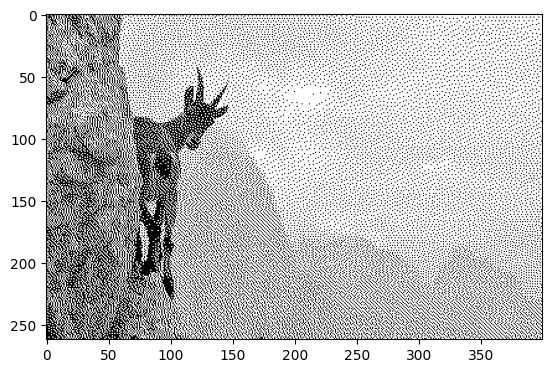

In [6]:
plt.imshow(dim, cmap="Greys_r")

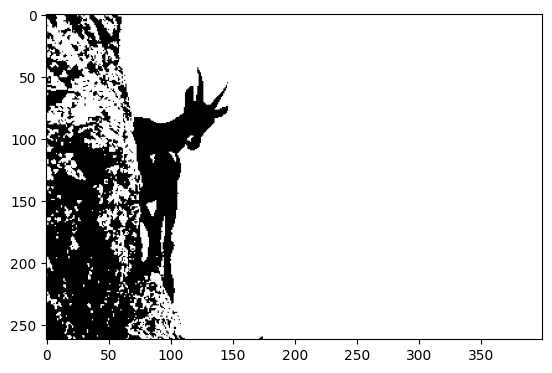

In [7]:
plt.imshow(rim, cmap="Greys_r")

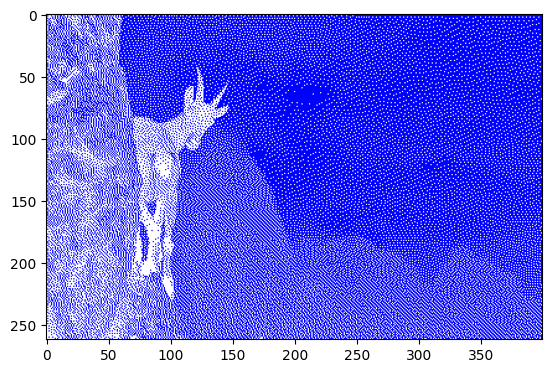

In [14]:
img = np.array(dim) 
# Convert RGB to BGR 
#img = cimg[:, :, ::-1].copy() 

img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
img[np.where((img==[255,255,255]).all(axis=2))] = [0,0,255]
img[np.where((img==[0,0,0]).all(axis=2))] = [255,255,255]

plt.imshow(img)